In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file=np.genfromtxt(fname='/content/서울특별시 동대문구.txt')
df=pd.DataFrame(file)
df.columns=['X','Y','Z']

In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.5 MB/s eta 0:00:00


In [ ]:
import pyproj
import folium

In [ ]:
def coord_change(coord, p1_type, p2_type):
  p1 = pyproj.Proj(init=p1_type)
  p2 = pyproj.Proj(init=p2_type)
  fx, fy = pyproj.transform(p1, p2, coord[:,0], coord[:,1])
  return np.dstack([fx,fy])[0]
coord_5186=np.array(df.iloc[:,:2])
coord_5174=coord_change(coord_5186,'epsg:5186',"epsg:5174")
coord_5174 = pd.DataFrame(coord_5174)
coord_5174.to_csv('데이터(EPSG:5174).csv')

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-5-867968d7f846>:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord[:,0], coord[:,

In [ ]:
df_5174=pd.read_excel('/content/결합데이터.xlsx')
df_5174=df_5174.iloc[:,1:]

In [ ]:
from scipy import interpolate
A20=df_5174.iloc[:,2]
df['I']=A20
df_ar=df.values
X=df_ar[:,0];Y = df_ar[:,1]; Z = df_ar[:,2]
def func(Xi,Yi):
    Xi_ar=np.repeat(Xi,len(X))
    X_diff=Xi_ar-X
    Yi_ar=np.repeat(Yi,len(Y))
    Y_diff=Yi_ar-Y
    dist=X_diff**2+Y_diff**2
    dist_sorted=sorted(dist)
    min=dist_sorted[24]
    min_list=np.where(dist<=min)
    X_new=list(X[min_list])
    Y_new=list(Y[min_list])
    Z_new=list(Z[min_list])
    f=interpolate.interp2d(X_new,Y_new,Z_new,kind='cubic')
    return f

In [ ]:
grad_X = list()
grad_Y = list()
for i in range(len(list(X))):
  Xi = X[i]
  Yi = Y[i]
  Zi = func(Xi,Yi)(Xi,Yi,dx=1,dy=0)
  grad_X.append(float(Zi))
for j in range(len(list(X))):
  Xi = X[j]
  Yi = Y[j]
  Zi = func(Xi,Yi)(Xi,Yi,dx=0,dy=1)
  grad_Y.append(float(Zi))
df['Z_X'] = grad_X
df['Z_Y'] = grad_Y
df.to_csv('높이 및 기울기 자료.csv')

/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=10,9 m=26 fp=1.090722 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,10 m=27 fp=0.570990 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)


In [ ]:
df_CNN = df.iloc[:,:4]
coord=df.values
I = coord[:,3]
def func_image(Xi,Yi):
    Xi_ar=np.repeat(Xi,len(X))
    X_diff=Xi_ar-X
    Yi_ar=np.repeat(Yi,len(Y))
    Y_diff=Yi_ar-Y
    dist=X_diff**2+Y_diff**2
    dist_sorted=sorted(dist)
    min=dist_sorted[24]
    min_list=np.where(dist<=min)
    X_new=list(X[min_list])
    Y_new=list(Y[min_list])
    Z_new=list(Z[min_list])
    I_new=list(I[min_list])
    df_image = pd.DataFrame()
    df_image['X'] = X_new
    df_image['Y'] = Y_new
    df_image['Z'] = Z_new
    df_image['I'] = I_new
    return df_image

In [ ]:
import seaborn as sns

In [ ]:
num = 0
num_list = list()
image_output_list = list()
for i in range(len(df_CNN['X'])):
  df_image = func_image(X[i],Y[i]).iloc[:,0:3]
  if len(df_image['X']) == 25 and (I[i] == '평지' or I[i] == '저지' or I[i] == '고지' or I[i] == '완경사' or I[i] == '급경사'):
    df_CNN = df_image.pivot('X', 'Y', 'Z')
    plt.rcParams['figure.figsize'] = [1/14.4, 1/14.4]
    ax = sns.heatmap(df_CNN, cbar = False, vmin = min(df_image['Z']),vmax = max(df_image['Z']), cmap = "gray")
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.savefig(f'/content/sample_data/cnn_test{i}.png',dpi=500)
    image_output_list.append(I[i])
    num_list.append(i)
    num = num+1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
df_image_input = pd.DataFrame(columns = range(34*34))

for i in range(num):
  image = cv2.imread(f'/content/sample_data/cnn_test{num_list[i]}.png',cv2.IMREAD_GRAYSCALE)
  image_flatten = image.flatten()
  df_image_input.loc[i] = image_flatten

In [ ]:
df_image_input.to_csv('/content/image_input.csv')

In [ ]:
output_list = list()
for i in image_output_list:
  if i == '평지':
    output_list.append(0)
  elif i == '저지':
    output_list.append(0)
  elif i == '고지':
    output_list.append(0)
  elif i == '완경사':
    output_list.append(1)
  elif i == '급경사':
    output_list.append(2)
df_image_input['info'] = output_list

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [ ]:
seed=777
tf.random.set_seed(seed)

X = np.array(df_image_input.iloc[:,0:1156])
Y = np.array(df_image_input.iloc[:,1156])
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=seed)

img_rows = 34
img_cols = 34
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 3

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

model = Sequential()
model.add(Conv2D(38, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train shape: (1105, 34, 34, 1)
1105 train samples
277 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 34, 34, 38)        988       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 38)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        9792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                     

Epoch 1/1000
18/18 [==============================] - 6s 286ms/step - loss: 0.6614 - accuracy: 0.7584 - val_loss: 0.5978 - val_accuracy: 0.8195
Epoch 2/1000
18/18 [==============================] - 6s 310ms/step - loss: 0.5992 - accuracy: 0.7928 - val_loss: 0.5216 - val_accuracy: 0.8195
Epoch 3/1000
18/18 [==============================] - 3s 150ms/step - loss: 0.5554 - accuracy: 0.7928 - val_loss: 0.4969 - val_accuracy: 0.8195
Epoch 4/1000
18/18 [==============================] - 3s 152ms/step - loss: 0.5358 - accuracy: 0.7991 - val_loss: 0.4799 - val_accuracy: 0.8087
Epoch 5/1000
18/18 [==============================] - 4s 241ms/step - loss: 0.5160 - accuracy: 0.8009 - val_loss: 0.4696 - val_accuracy: 0.8159
Epoch 6/1000
18/18 [==============================] - 3s 167ms/step - loss: 0.5077 - accuracy: 0.8045 - val_loss: 0.4522 - val_accuracy: 0.8159
Epoch 7/1000
18/18 [==============================] - 3s 158ms/step - loss: 0.4686 - accuracy: 0.8109 - val_loss: 0.4381 - val_accuracy:

9/9 [==============================] - 0s 25ms/step - loss: 0.6999 - accuracy: 0.8664

 Validation Accuracy: 0.8664259910583496


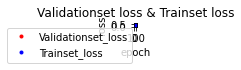

Evaluate on Test data
35/35 [==============================] - 1s 11ms/step - loss: 0.6999 - accuracy: 0.8664
Test Loss, Test Accuracy. [0.6998561024665833, 0.8664259910583496]


In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)
history = model.fit(X_train,Y_train,
                  validation_data=(X_test,Y_test),
                  epochs=1000,batch_size=64, callbacks=[early_stopping_callback])
model.save('CNN_MIDDLE')
print(f'\n Validation Accuracy: {model.evaluate(X_test, Y_test)[1]}')
Y_vloss = history.history['val_loss']
Y_loss = history.history['loss']

X_len=np.arange(len(Y_loss))

plt.plot(X_len,Y_vloss,marker='o',linestyle = 'none', c='red',markersize=3,label='Validationset_loss')
plt.plot(X_len,Y_loss,marker='o',linestyle = 'none', c='blue',markersize=3,label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Validationset loss & Trainset loss")
plt.show()

print('Evaluate on Test data')
CNN_MIDDLE = load_model('CNN_MIDDLE')
eval = CNN_MIDDLE.evaluate(X_test, Y_test, batch_size = 8)
print('Test Loss, Test Accuracy.', eval)

In [ ]:
X_total = np.array(df_image_input.iloc[:,0:1156])

X_total = X_total.reshape(X_total.shape[0], img_rows, img_cols, 1)

X_total = X_total.astype('float32') / 255.

CNN_pred = CNN_MIDDLE.predict(X_total)

44/44 [==============================] - 1s 21ms/step


In [ ]:
pred_output = list()
for i in range(len(output_list)):
  pred_max = np.max(CNN_pred[i,:])
  max_list = CNN_pred[i,:]
  a = np.where(max_list == pred_max)
  a = a[0][0]
  pred_output.append(a)

In [ ]:
df_CNN = df
df_CNN['Output'] = 'nan'

In [ ]:
df_CNN_array = np.array(df_CNN)
for i in range(len(pred_output)):
  num = num_list[i]
  df_CNN_array[num,6] = pred_output[i]

In [ ]:
for i in range(len(df_CNN_array)):
  if df_CNN_array[i,6] == 0:
    df_CNN_array[i,6] = '평지'
  elif df_CNN_array[i,6] == 1:
    df_CNN_array[i,6] = '완경사'
  elif df_CNN_array[i,6] == 2:
    df_CNN_array[i,6] = '급경사'

In [ ]:
df_CNN = pd.DataFrame(df_CNN_array)

In [ ]:
file1 = np.genfromtxt(fname='/content/서울특별시 강북구.txt')
df1 = pd.DataFrame(file1)
df1.columns = ['X','Y','Z']

file2 = np.genfromtxt(fname='/content/서울특별시 관악구.txt')
df2 = pd.DataFrame(file2)
df2.columns = ['X','Y','Z']

file3 = np.genfromtxt(fname='/content/서울특별시 동대문구.txt')
df3 = pd.DataFrame(file3)
df3.columns = ['X','Y','Z']

df_ANN_MIDDLE = pd.concat([df1,df2,df3])

In [ ]:
df_ANN_data = pd.read_excel('/content/결합데이터(3개구).xlsx')
df_ANN_data = df_ANN_data.iloc[:,1:]

In [ ]:
A20=list(df_ANN_data.iloc[:,2])
df_ANN_MIDDLE['I']=A20
coord=df_ANN_MIDDLE.values
X=coord[:,0];Y = coord[:,1]; Z = coord[:,2]
def func(Xi,Yi):
    Xi_ar=np.repeat(Xi,len(X))
    X_diff=Xi_ar-X
    Yi_ar=np.repeat(Yi,len(Y))
    Y_diff=Yi_ar-Y
    dist=X_diff**2+Y_diff**2
    dist_sorted=sorted(dist)
    min=dist_sorted[24]
    min_list=np.where(dist<=min)
    X_new=list(X[min_list])
    Y_new=list(Y[min_list])
    Z_new=list(Z[min_list])
    f=interpolate.interp2d(X_new,Y_new,Z_new,kind='cubic')
    return f

In [ ]:
grad_X = list()
grad_Y = list()
for i in range(len(list(X))):
  Xi = X[i]
  Yi = Y[i]
  Zi = func(Xi,Yi)(Xi,Yi,dx=1,dy=0)
  grad_X.append(float(Zi))
for j in range(len(list(X))):
  Xi = X[j]
  Yi = Y[j]
  Zi = func(Xi,Yi)(Xi,Yi,dx=0,dy=1)
  grad_Y.append(float(Zi))
df_ANN_MIDDLE['Z_X'] = grad_X
df_ANN_MIDDLE['Z_Y'] = grad_Y
df_ANN_MIDDLE.to_csv('높이 및 기울기 자료.csv')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=9,10 m=25 fp=10.238411 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=9,10 m=26 fp=173121880784.692047 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/usr/local/lib/python3.8/dist-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m to

In [ ]:
cond1 = df_ANN_MIDDLE['I'] == '평지'
cond2 = df_ANN_MIDDLE['I'] == '저지'
cond3 = df_ANN_MIDDLE['I'] == '고지'
cond = cond1 | cond2 | cond3
df_ANN_MIDDLE = df_ANN_MIDDLE.loc[cond]

In [ ]:
data=df_ANN_MIDDLE
scaler=MinMaxScaler()
data_before=data.iloc[:,[2,4,5]]
data_proceed=scaler.fit_transform(data_before)

seed=555
tf.random.set_seed(seed)

X=pd.DataFrame(data_proceed)
Y_list=list(data.iloc[:,3])
for i in range(len(Y_list)):
  if Y_list[i] == '평지':
    Y_list[i] = 0
  elif Y_list[i] == '저지':
    Y_list[i] = 1
  elif Y_list[i] == '고지':
    Y_list[i] = 2

Y = pd.DataFrame(Y_list)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 28        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 3)                 24        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
27/27 [==============================] - 2s

18/18 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9948

 Validation Accuracy: 0.9947643876075745


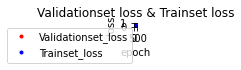

Evaluate on Test data
72/72 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9930
Test Loss, Test Accuracy. [0.02545825019478798, 0.9930192232131958]


In [ ]:
X_tr, X_test, Y_tr, Y_test=train_test_split(X,Y,test_size=0.2, random_state=seed)
X_train, X_val, Y_train, Y_val=train_test_split(X_tr,Y_tr,test_size=0.25, random_state=seed)

model=Sequential()
model.add(Dense(7,input_dim=3,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=100)
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                  epochs=1000,batch_size=64, callbacks=[early_stopping_callback])
model.save('ANN_MIDDLE')
print(f'\n Validation Accuracy: {model.evaluate(X_val, Y_val)[1]}')

Y_vloss=history.history['val_loss']
Y_loss=history.history['loss']

X_len=np.arange(len(Y_loss))

plt.plot(X_len,Y_vloss,marker='o',linestyle = 'none', c='red',markersize=3,label='Validationset_loss')
plt.plot(X_len,Y_loss,marker='o',linestyle = 'none', c='blue',markersize=3,label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Validationset loss & Trainset loss")
plt.show()

print('Evaluate on Test data')
ANN_MIDDLE=load_model('ANN_MIDDLE')
eval_ANN = ANN_MIDDLE.evaluate(X_test, Y_test, batch_size = 8)
print('Test Loss, Test Accuracy.', eval_ANN)

In [ ]:
num = 0
num_list = list()
for i in range(len(df_CNN)):
  if df_CNN_array[i,6] == '평지':
    num_list.append(i)
    num += 1

In [ ]:
df_CNN_ANN = df_CNN
cond_ann = df_CNN_ANN[6] == '평지'
df_CNN_ANN = df_CNN_ANN.loc[cond_ann]

In [ ]:
data = df_CNN_ANN
scaler = MinMaxScaler()
data_before = data.iloc[:,[2,4,5]]
data_proceed = scaler.fit_transform(data_before)

X_ann = pd.DataFrame(data_proceed)

ANN_MIDDLE_pred = ANN_MIDDLE.predict(X_ann)

35/35 [==============================] - 0s 1ms/step


In [ ]:
pred_output_ann = list()
for i in range(len(num_list)):
  pred_max = np.max(ANN_MIDDLE_pred[i,:])
  max_list = ANN_MIDDLE_pred[i,:]
  a = np.where(max_list == pred_max)
  a = a[0]
  a = a[0]
  pred_output_ann.append(a)

In [ ]:
pred_output_ann = np.array(pred_output_ann)

In [ ]:
df_ANN_array=np.array(df_CNN)
num = 0
for i in range(len(df_ANN_array)):
  if df_ANN_array[i,6] == '평지':
    df_ANN_array[i,6] = pred_output_ann[num]
    num += 1

In [ ]:
for i in range(len(df_ANN_array)):
  if df_ANN_array[i,6] == 0:
    df_ANN_array[i,6] = '평지'
  elif df_ANN_array[i,6] == 1:
    df_ANN_array[i,6] = '저지'
  elif df_ANN_array[i,6] == 2:
    df_ANN_array[i,6] = '고지'

In [ ]:
df_fin=pd.DataFrame(df_ANN_array)

In [ ]:
df_fin.to_csv('확인.csv',encoding='cp949')

In [ ]:
df_ANN_ANN=df_fin
cond1 = df_ANN_ANN[3] == '평지'
cond2 = df_ANN_ANN[3] == '저지'
cond3 = df_ANN_ANN[3] == '고지'
cond4 = df_ANN_ANN[3] == '완경사'
cond5 = df_ANN_ANN[3] == '급경사'
cond = cond1 | cond2 | cond3 | cond4 | cond5
df_ANN_ANN = df_ANN_ANN.loc[cond]

In [ ]:
data=df_ANN_ANN
scaler=MinMaxScaler()
data_before=data.iloc[:,[2,4,5]]
data_proceed=scaler.fit_transform(data_before)

seed=777
tf.random.set_seed(seed)

X=pd.DataFrame(data_proceed)
Y_list=list(data.iloc[:,3])
for i in range(len(Y_list)):
  if Y_list[i] == '평지':
    Y_list[i] = 0
  elif Y_list[i] == '저지':
    Y_list[i] = 0
  elif Y_list[i] == '고지':
    Y_list[i] = 0
  elif Y_list[i] == '완경사':
    Y_list[i] = 1
  elif Y_list[i] == '급경사':
    Y_list[i] = 2

Y = pd.DataFrame(Y_list)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 7)                 28        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 3)                 24        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 1s

9/9 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8520

 Validation Accuracy: 0.8519855737686157


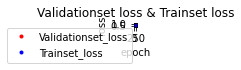

Evaluate on Test data
35/35 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8412
Test Loss, Test Accuracy. [0.39314183592796326, 0.8411552309989929]


In [ ]:
X_tr, X_test, Y_tr, Y_test=train_test_split(X,Y,test_size=0.2, random_state=seed)
X_train, X_val, Y_train, Y_val=train_test_split(X_tr,Y_tr,test_size=0.25, random_state=seed)

model=Sequential()
model.add(Dense(7,input_dim=3,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=100)
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                  epochs=1000,batch_size=64, callbacks=[early_stopping_callback])
model.save('ANN_OUT')
print(f'\n Validation Accuracy: {model.evaluate(X_val, Y_val)[1]}')

Y_vloss=history.history['val_loss']
Y_loss=history.history['loss']

X_len=np.arange(len(Y_loss))

plt.plot(X_len,Y_vloss,marker='o',linestyle = 'none', c='red',markersize=3,label='Validationset_loss')
plt.plot(X_len,Y_loss,marker='o',linestyle = 'none', c='blue',markersize=3,label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Validationset loss & Trainset loss")
plt.show()

print('Evaluate on Test data')
ANN_OUT=load_model('ANN_OUT')
eval_ANN_OUT = ANN_OUT.evaluate(X_test, Y_test, batch_size = 8)
print('Test Loss, Test Accuracy.', eval_ANN_OUT)

In [ ]:
df_ANN_OUT = df_fin
cond_ann = df_ANN_OUT[6] == 'nan'
df_ANN_OUT = df_ANN_OUT.loc[cond_ann]

In [ ]:
data = df_ANN_OUT
scaler = MinMaxScaler()
data_before = data.iloc[:,[2,4,5]]
data_proceed = scaler.fit_transform(data_before)

X_ANN_OUT = pd.DataFrame(data_proceed)

ANN_OUT_pred = ANN_OUT.predict(X_ANN_OUT)

45/45 [==============================] - 0s 2ms/step


In [ ]:
pred_output_out = list()
for i in range(len(ANN_OUT_pred)):
  pred_max = np.max(ANN_OUT_pred[i,:])
  max_list = ANN_OUT_pred[i,:]
  a = np.where(max_list == pred_max)
  a = a[0][0]
  pred_output_out.append(a)

In [ ]:
pred_output_out = np.array(pred_output_out)

In [ ]:
df_fin = np.array(df_fin)
num = 0
for i in range(len(df_fin)):
  if df_fin[i,6] == 'nan':
    df_fin[i,6] = pred_output_out[num]
    num += 1

In [ ]:
for i in range(len(df_fin)):
  if df_fin[i,6] == 0:
    df_fin[i,6] = '재분류'
  elif df_fin[i,6] == 1:
    df_fin[i,6] = '완경사'
  elif df_fin[i,6] == 2:
    df_fin[i,6] = '급경사'

In [ ]:
print(pd.DataFrame(df_fin))

              0          1      2    3         4         5    6
0     201609.25  552642.62  18.86  NaN -0.445486  0.016227  재분류
1     201609.25  552552.62  17.89  NaN   0.00789  0.000974  재분류
2     201609.25  552462.62  19.02  NaN -0.002013 -0.009359  재분류
3     201609.25  552372.62  17.21  NaN  0.012034  0.046611  재분류
4     201699.25  552822.62   19.5  NaN   -0.0012   0.00375  재분류
...         ...        ...    ...  ...       ...       ...  ...
2794  207369.25  552732.62  25.37  NaN  0.120402   0.03439  재분류
2795  207369.25  552642.62  24.45  NaN  0.104222 -0.009247  재분류
2796  207369.25  552552.62  25.96  NaN  0.146653 -0.024454  완경사
2797  207369.25  552462.62  26.74  NaN  0.198753  0.006139  완경사
2798  207369.25  552372.62   23.9  NaN      0.08  0.060566  재분류

[2799 rows x 7 columns]


In [ ]:
df_fin_last = pd.DataFrame(df_fin)
cond_last = df_fin_last[6] == '재분류'
cond_last2 = df_fin_last[6] == '평지'
cond_last3 = df_fin_last[6] == '저지'
cond_last4 = df_fin_last[6] == '고지'
cond_last5 = df_fin_last[6] == '완경사'
cond_last6 = df_fin_last[6] == '급경사'
df_fin_part_1 = df_fin_last.loc[cond_last]
cond_last_2 = cond_last2 | cond_last3 | cond_last4 | cond_last5 | cond_last6
df_fin_part_2 = df_fin_last.loc[cond_last_2]
scaler = MinMaxScaler()
data_before = df_fin_part_1.iloc[:,[2,4,5]]
data_proceed = scaler.fit_transform(data_before)

X_ANN_OUT_LAST = pd.DataFrame(data_proceed)

ANN_OUT_LAST_pred = ANN_MIDDLE.predict(X_ANN_OUT_LAST)

pred_output_out_last = list()
for i in range(len(ANN_OUT_LAST_pred)):
  pred_max = np.max(ANN_OUT_LAST_pred[i,:])
  max_list = ANN_OUT_LAST_pred[i,:]
  a = np.where(max_list == pred_max)
  a = a[0][0]
  pred_output_out_last.append(a)

pred_output_out_last = np.array(pred_output_out_last)
df_fin_part_1 = np.array(df_fin_part_1)

num = 0
for i in range(len(df_fin_part_1)):
  df_fin_part_1[i,6] = pred_output_out_last[num]
  num += 1

for i in range(len(df_fin_part_1)):
  if df_fin_part_1[i,6] == 0:
    df_fin_part_1[i,6] = '평지'
  elif df_fin_part_1[i,6] == 1:
    df_fin_part_1[i,6] = '저지'
  elif df_fin_part_1[i,6] == 2:
    df_fin_part_1[i,6] = '고지'

df_fin_part_1 = pd.DataFrame(df_fin_part_1)

39/39 [==============================] - 0s 1ms/step


In [ ]:
df_last = pd.concat([df_fin_part_1,df_fin_part_2])
print(df_last)

              0          1      2    3         4         5    6
0     201609.25  552642.62  18.86  NaN -0.445486  0.016227   고지
1     201609.25  552552.62  17.89  NaN   0.00789  0.000974   고지
2     201609.25  552462.62  19.02  NaN -0.002013 -0.009359   고지
3     201609.25  552372.62  17.21  NaN  0.012034  0.046611   고지
4     201699.25  552822.62   19.5  NaN   -0.0012   0.00375   고지
...         ...        ...    ...  ...       ...       ...  ...
2557  206739.25  552552.62  15.83   평지 -0.020367  0.006204   평지
2558  206739.25  552462.62  14.51   평지  -0.02929  0.023157   평지
2559  206739.25  552372.62  12.16   평지 -0.034652  0.017796   평지
2796  207369.25  552552.62  25.96  NaN  0.146653 -0.024454  완경사
2797  207369.25  552462.62  26.74  NaN  0.198753  0.006139  완경사

[2799 rows x 7 columns]


In [ ]:
df_last = pd.DataFrame(df_last)
df_last.to_excel('최종데이터.xlsx')